# Segmenting a Flatfish by Texture

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import generic_filter
from skimage.filters.rank import entropy
from skimage.morphology import rectangle

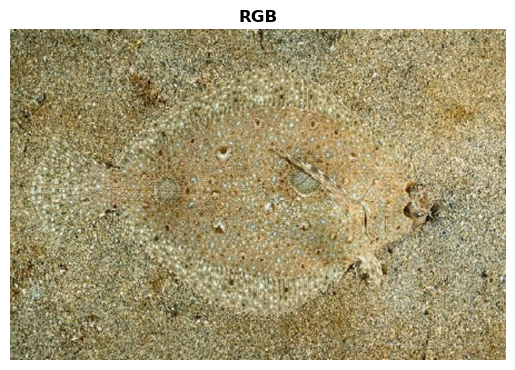

In [2]:
fish = cv2.imread("./images/flatfish.jpg")
fish = cv2.cvtColor(fish, cv2.COLOR_BGR2RGB)

plt.imshow(fish)
plt.title('RGB')
plt.axis('off')
plt.show()

Convert the image to grayscale.

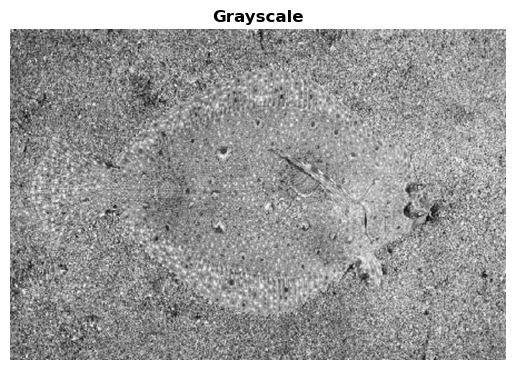

In [3]:
fish_gray = cv2.cvtColor(fish, cv2.COLOR_RGB2GRAY)

plt.imshow(fish_gray, cmap='gray')
plt.title('Grayscale')
plt.axis('off')
plt.show()

Apply a standard deviation filter.

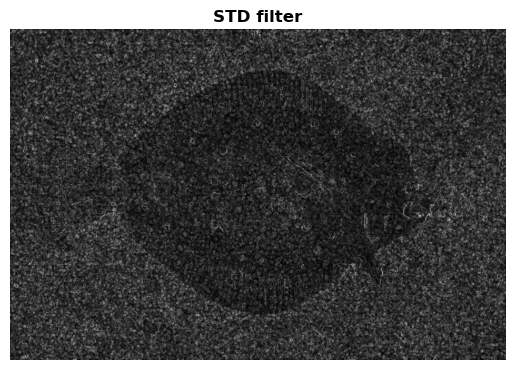

In [4]:
fish_std = generic_filter(fish_gray, np.std, size=3)

plt.imshow(fish_std, cmap='gray')
plt.title('STD filter')
plt.axis('off')
plt.show()

Apply a range filter.

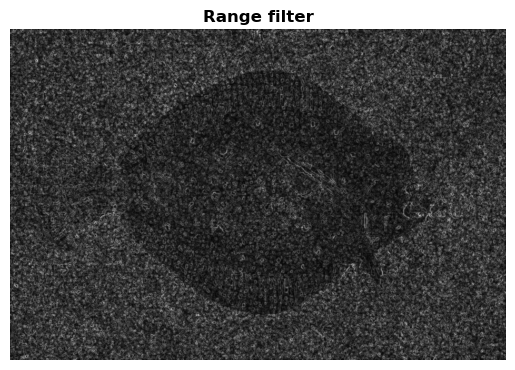

In [5]:
# http://docs.opencv.org/master/d4/d86/group__imgproc__filter.html#ga67493776e3ad1a3df63883829375201f
fish_range = cv2.morphologyEx(fish_gray, cv2.MORPH_GRADIENT, kernel=cv2.getStructuringElement(cv2.MORPH_RECT, ksize=(3, 3)))

plt.imshow(fish_range, cmap='gray')
plt.title('Range filter')
plt.axis('off')
plt.show()

Apply an entropy filter.

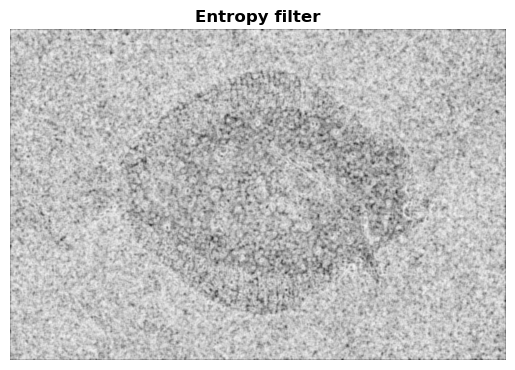

In [6]:
# https://scikit-image.org/docs/stable/api/skimage.filters.rank.html#skimage.filters.rank.entropy
fish_entropy = entropy(fish_gray, rectangle(9, 9))

plt.imshow(fish_entropy, cmap='gray')
plt.title('Entropy filter')
plt.axis('off')
plt.show()

The image filtered with standard deviation does a good job of creating contrast between the fish and the background, so let's create a segmentation based on that image.

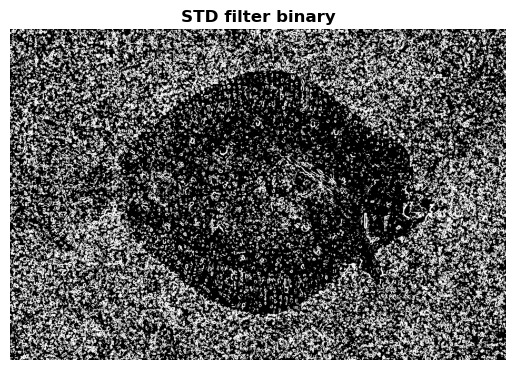

In [7]:
_, fish_std_binary = cv2.threshold(fish_std, 127, 255, cv2.THRESH_OTSU) # https://en.wikipedia.org/wiki/Otsu%27s_method

plt.imshow(fish_std_binary, cmap='gray')
plt.title('STD filter binary')
plt.axis('off')
plt.show()